# Lab 5

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron as SklearnPerceptron
from sklearn.metrics import accuracy_score

## Perceptron

1.1 Logical AND dataset

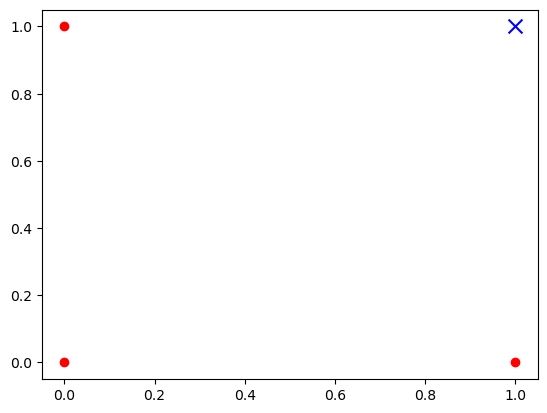

In [91]:
# 1) Create AND dataset
X = np.array([
[0, 0],
[0, 1],
[1, 0],
[1, 1]
], dtype=float)
y = np.array([0, 0, 0, 1]) # AND outputs
# 2) Separate points by class
X0 = X[y == 0]
X1 = X[y == 1]
# 3) Plot
plt.scatter(X0[:, 0], X0[:, 1], c="red", marker="o", label="Class 0")
plt.scatter(X1[:, 0], X1[:, 1], c="blue", marker="x", s=100, label="Class 1")

Implement the Perceptron algorithm from scratch

In [92]:
# implement class
class Perceptron:
    def __init__(self, lr=0.1, n=100):
        self.lr = lr
        self.n_epochs = n
        self.weights = None
        self.bias = None
        self.epochs_converged = 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0.0
        
        for epoch in range(self.n_epochs):
            updates = 0
            for i in range(n_samples):
                linear_output = np.dot(X[i], self.weights) + self.bias
                y_pred = 1.0 if linear_output >= 0 else 0.0
                
                if y[i] != y_pred:
                    update = self.lr * (y[i] - y_pred)
                    self.weights += update * X[i]
                    self.bias += update
                    updates += 1
            
            if updates == 0:
                self.epochs_converged = epoch + 1
                return self
                
        self.epochs_converged = self.n_epochs
        return self

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = np.where(linear_output >= 0, 1, 0)
        return y_predicted

Visualize the learned decision boundary

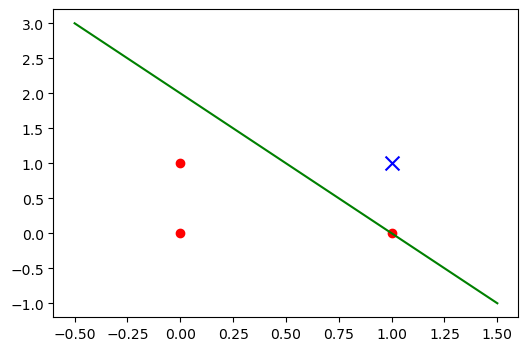

In [93]:
p_a = Perceptron(lr=0.1, n=100)
p_a.fit(X, y)

w = p_a.weights
b = p_a.bias

x_plot = np.linspace(-0.5, 1.5, 10)
y_plot = (-w[0] * x_plot - b) / w[1]

plt.figure(figsize=(6, 4))
plt.scatter(X0[:, 0], X0[:, 1], c="red", marker="o", label="Class 0")
plt.scatter(X1[:, 0], X1[:, 1], c="blue", marker="x", s=100, label="Class 1")
plt.plot(x_plot, y_plot, c="green", label="Decision Boundary")



Track the number of epochs until convergence

In [94]:
print(f"Model converged in {p_a.epochs_converged} epochs.")

Model converged in 4 epochs.


Show influence of learning rate on convergence

In [95]:
lrs = [1.0, 0.1, 0.01, 0.001]
ep = {}

for lr in lrs:
    m = Perceptron(lr=lr, n=100)
    m.fit(X, y)
    ep[lr] = m.epochs_converged

print("Convergenced by Learning Rate:")
for lr, epochs in ep.items():
    print(f"LR = {lr}: {epochs} epochs")

Convergenced by Learning Rate:
LR = 1.0: 6 epochs
LR = 0.1: 4 epochs
LR = 0.01: 6 epochs
LR = 0.001: 6 epochs


### 1.2 Logical XOR Dataset

Modify dataset for XOR and Train Perceptron

XOR model ran for 100 epoch (hit max epochs).


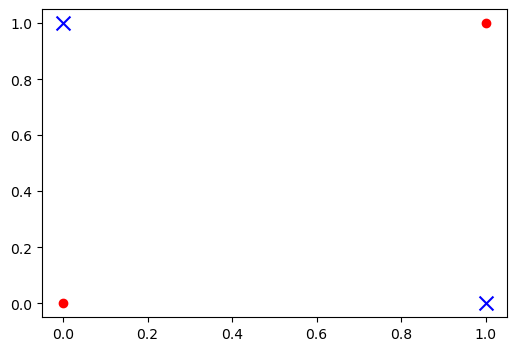

In [96]:
y_xor = np.array([0, 1, 1, 0], dtype=float)

X0_xor = X[y_xor == 0]
X1_xor = X[y_xor == 1]

p_xor = Perceptron(lr=0.1, n=100)
p_xor.fit(X, y_xor)

print(f"XOR model ran for {p_xor.epochs_converged} epoch (hit max epochs).")

plt.figure(figsize=(6, 4))
plt.scatter(X0_xor[:, 0], X0_xor[:, 1], c="red", marker="o", label="Class 0 (A ⊕ B = 0)")
plt.scatter(X1_xor[:, 0], X1_xor[:, 1], c="blue", marker="x", s=100, label="Class 1 (A ⊕ B = 1)")


In [97]:
y_pred_xor = p_xor.predict(X)
xor_accuracy = np.mean(y_pred_xor == y_xor)

print(f"XOR dataset inputs: \n{X}")
print(f"XOR true labels: \t{y_xor}")
print(f"XOR predicted labels: \t{y_pred_xor}")
print(f"Final Accuracy on XOR: {xor_accuracy * 100:.2f}%")

XOR dataset inputs: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
XOR true labels: 	[0. 1. 1. 0.]
XOR predicted labels: 	[1 1 0 0]
Final Accuracy on XOR: 50.00%


Gaussian Dataset (scikit-learn)

Generate Dataset

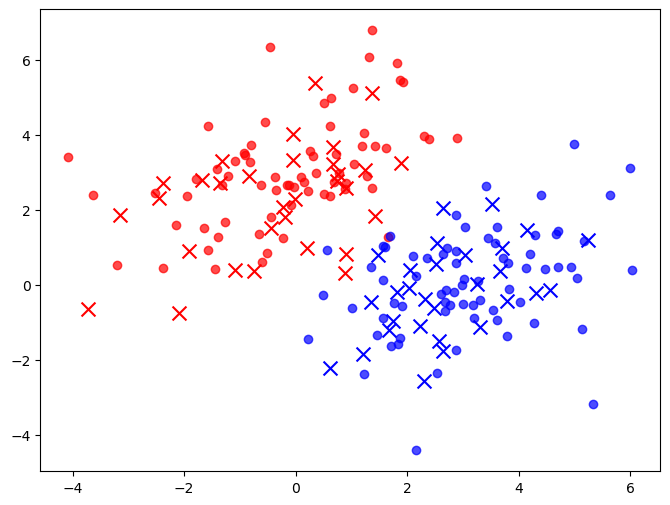

In [98]:
m1 = np.array([0, 3])
m2 = np.array([3, 0])
C = np.array([[2, 1], [1, 2]])
n_samples = 100

data1 = np.random.multivariate_normal(mean=m1, cov=C, size=n_samples)
data2 = np.random.multivariate_normal(mean=m2, cov=C, size=n_samples)

X_gauss = np.vstack((data1, data2))
y_gauss = np.array([0] * n_samples + [1] * n_samples)

X_train, X_val, y_train, y_val = train_test_split(X_gauss, y_gauss, test_size=0.3, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='red', marker='o', alpha=0.7, label='Class 0 (Train)')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='blue', marker='o', alpha=0.7, label='Class 1 (Train)')
plt.scatter(X_val[y_val == 0][:, 0], X_val[y_val == 0][:, 1], c='red', marker='x', s=100, label='Class 0 (Val)')
plt.scatter(X_val[y_val == 1][:, 0], X_val[y_val == 1][:, 1], c='blue', marker='x', s=100, label='Class 1 (Val)')

plt.show()

Train sklearn.linear_model.Perceptron and Measure Accuracy

In [99]:
sk_perceptron = SklearnPerceptron(max_iter=1000, tol=1e-3, random_state=42)
sk_perceptron.fit(X_train, y_train)

train_pred = sk_perceptron.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)

val_pred = sk_perceptron.predict(X_val)
val_acc = accuracy_score(y_val, val_pred)

print(f"Scikit-learn Perceptron Model")
print(f"Training Set Accuracy: {train_acc * 100:.2f}%")
print(f"Validation Set Accuracy: {val_acc * 100:.2f}%")

Scikit-learn Perceptron Model
Training Set Accuracy: 98.57%
Validation Set Accuracy: 96.67%


Visualize the decision boundary

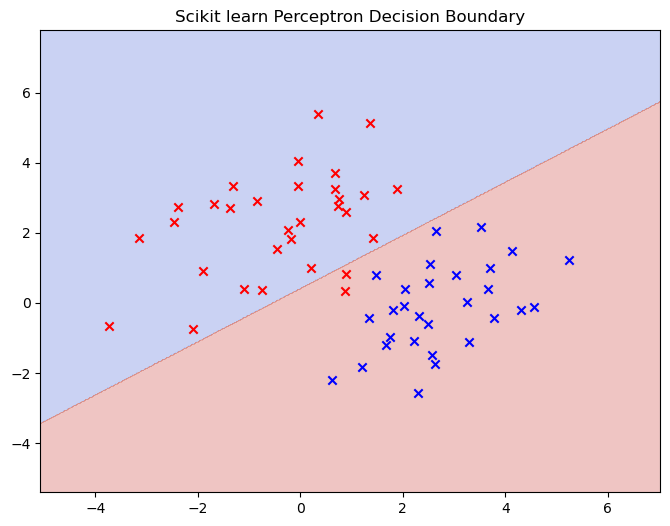

In [100]:
x_min, x_max = X_gauss[:, 0].min() - 1, X_gauss[:, 0].max() + 1
y_min, y_max = X_gauss[:, 1].min() - 1, X_gauss[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                   np.arange(y_min, y_max, 0.02))

Z = sk_perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

plt.scatter(X_val[y_val == 0][:, 0], X_val[y_val == 0][:, 1], c='red', marker='x', label='Class 0 (Val)')
plt.scatter(X_val[y_val == 1][:, 0], X_val[y_val == 1][:, 1], c='blue', marker='x', label='Class 1 (Val)')

plt.title("Scikit learn Perceptron Decision Boundary")

plt.show()

## Exploring Activation Functions

In [101]:
import time

class SingleNeuron:
    def __init__(self, learning_rate=0.1, n_epochs=100, activation='step'):
        self.lr = learning_rate
        self.n_epochs = n_epochs
        self.activation = activation
        self.weights = None
        self.bias = None

    def _activation_func(self, z):
        if self.activation == 'sigmoid':
            return 1.0 / (1.0 + np.exp(-z))
        elif self.activation == 'tanh':
            return np.tanh(z)
        elif self.activation == 'relu':
            return np.maximum(0, z)
        elif self.activation == 'step':
            return 1.0 if z >= 0 else 0.0
        return z

    def _activation_deriv(self, z):
        if self.activation == 'sigmoid':
            a = self._activation_func(z)
            return a * (1.0 - a)
        elif self.activation == 'tanh':
            return 1.0 - np.tanh(z)**2
        elif self.activation == 'relu':
            return np.where(z >= 0, 1, 0)
        return 1.0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0.0

        for _ in range(self.n_epochs):
            for i in range(n_samples):
                z = np.dot(X[i], self.weights) + self.bias
                
                if self.activation == 'step':
                    y_pred = self._activation_func(z)
                    if y[i] != y_pred:
                        update = self.lr * (y[i] - y_pred)
                        self.weights += update * X[i]
                        self.bias += update
                else:
                    a = self._activation_func(z)
                    deriv = self._activation_deriv(z)
                    error = y[i] - a
                    update = self.lr * error * deriv
                    self.weights += update * X[i]
                    self.bias += update
        return self

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        
        if self.activation == 'step':
            return np.where(z >= 0, 1, 0)
        elif self.activation == 'sigmoid':
            a = self._activation_func(z)
            return np.where(a >= 0.5, 1, 0)
        elif self.activation == 'tanh':
            a = self._activation_func(z)
            return np.where(a >= 0.0, 1, 0)
        elif self.activation == 'relu':
            a = self._activation_func(z)
            return np.where(a >= 0.5, 1, 0)
        
        return np.where(z >= 0, 1, 0)

    def plot_decision_boundary(self, X, y, title="Decision Boundary"):
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                           np.arange(y_min, y_max, 0.02))
        
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        plt.figure(figsize=(6, 4))
        plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
        
        plt.scatter(X[y==0, 0], X[y==0, 1], c='red', marker='o', label='Class 0')
        plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', marker='x', s=100, label='Class 1')
        
        plt.title(f"{title} ({self.activation})")

        plt.show()

Compare performance on the 3 datasets

In [102]:
activations = ['step', 'sigmoid', 'tanh', 'relu']
results = {}

X_and = X 
y_and = y 
y_xor = np.array([0, 1, 1, 0], dtype=float)

n_epochs = 100
learning_rate = 0.1

AND

Activation: step
Accuracy: 100.00%
Time: 0.005321s


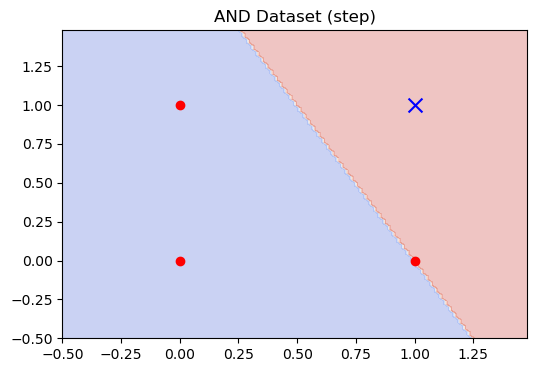

Activation: sigmoid
Accuracy: 75.00%
Time: 0.003583s


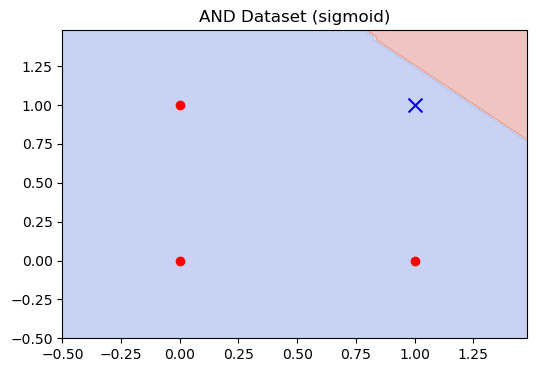

Activation: tanh
Accuracy: 50.00%
Time: 0.003499s


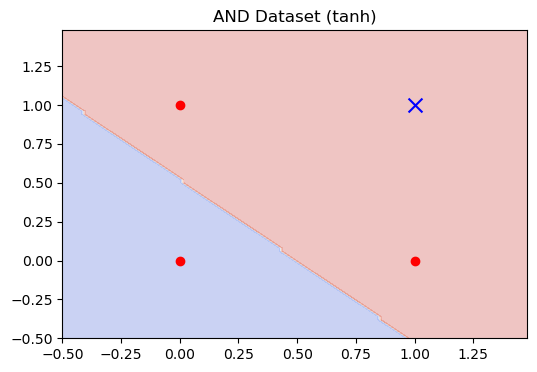

Activation: relu
Accuracy: 100.00%
Time: 0.006819s


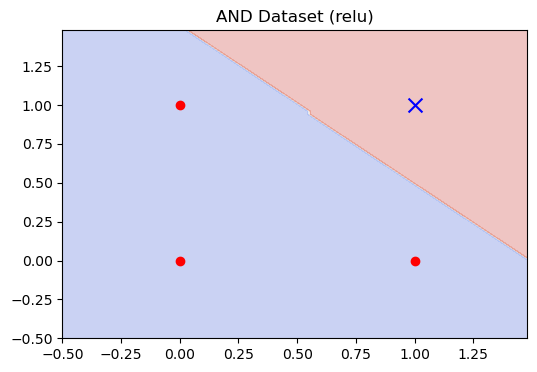

In [103]:
for act in activations:
    m = SingleNeuron(learning_rate=learning_rate, n_epochs=n_epochs, activation=act)
    
    start_time = time.time()
    m.fit(X_and, y_and)
    train_time = time.time() - start_time
    
    y_pred = m.predict(X_and)
    acc = accuracy_score(y_and, y_pred)
    
    results[('AND', act)] = {'acc': acc, 'time': train_time}
    print(f"Activation: {act}")
    print(f"Accuracy: {acc*100:.2f}%")
    print(f"Time: {train_time:.6f}s")
    
    m.plot_decision_boundary(X_and, y_and, title="AND Dataset")

XOR

Activation: step
Accuracy: 50.00%
time: 0.005996s


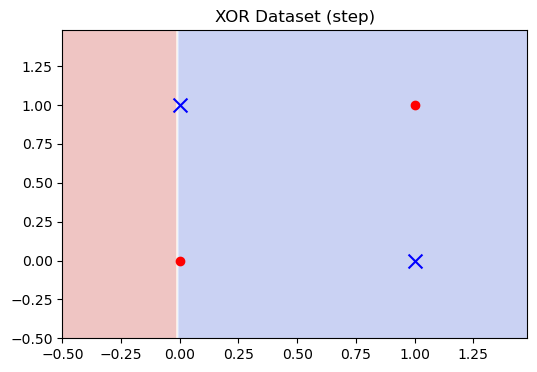

Activation: sigmoid
Accuracy: 25.00%
time: 0.003485s


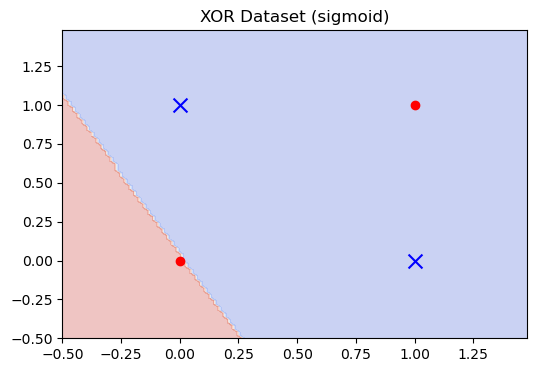

Activation: tanh
Accuracy: 50.00%
time: 0.003473s


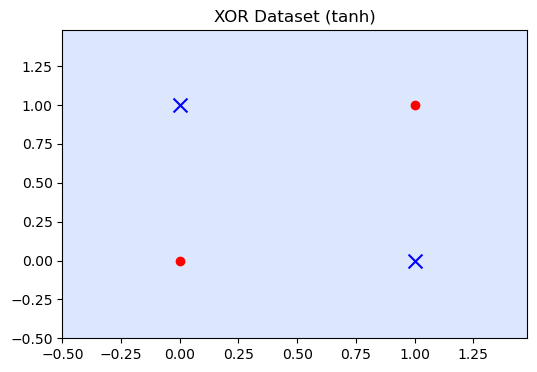

Activation: relu
Accuracy: 25.00%
time: 0.004636s


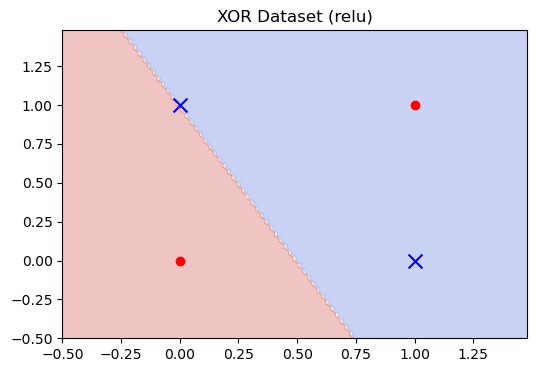

In [104]:
for act in activations:
    m = SingleNeuron(learning_rate=learning_rate, n_epochs=n_epochs, activation=act)
    
    start_time = time.time()
    m.fit(X_and, y_xor)
    train_time = time.time() - start_time
    
    y_pred = m.predict(X_and)
    acc = accuracy_score(y_xor, y_pred)
    
    results[('XOR', act)] = {'acc': acc, 'time': train_time}
    print(f"Activation: {act}")
    print(f"Accuracy: {acc*100:.2f}%")
    print(f"time: {train_time:.6f}s")

    m.plot_decision_boundary(X_and, y_xor, title="XOR Dataset")

Gaussian Dataset

Activation: step
Train Accuracy: 99.29%
Val Accuracy: 96.67%
Time: 0.054716s


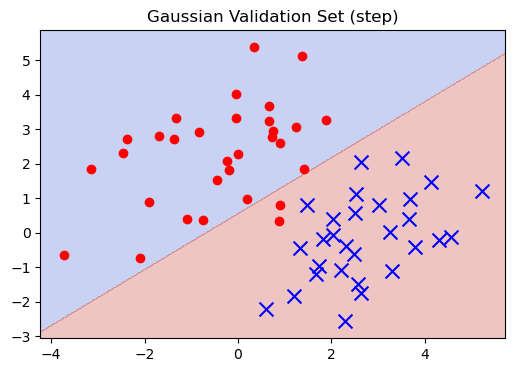

Activation: sigmoid
Train Accuracy: 98.57%
Val Accuracy: 96.67%
Time: 0.101558s


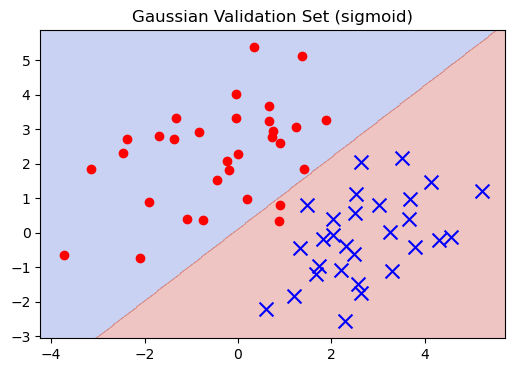

Activation: tanh
Train Accuracy: 70.71%
Val Accuracy: 66.67%
Time: 0.092449s


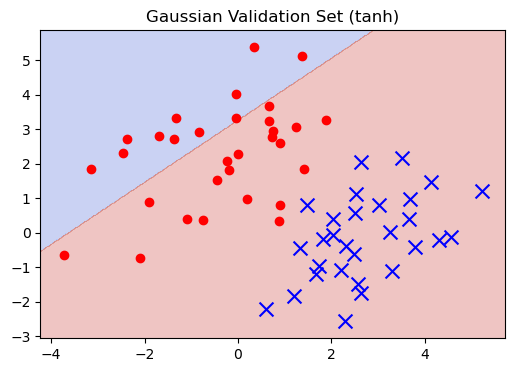

Activation: relu
Train Accuracy: 98.57%
Val Accuracy: 98.33%
Time: 0.141000s


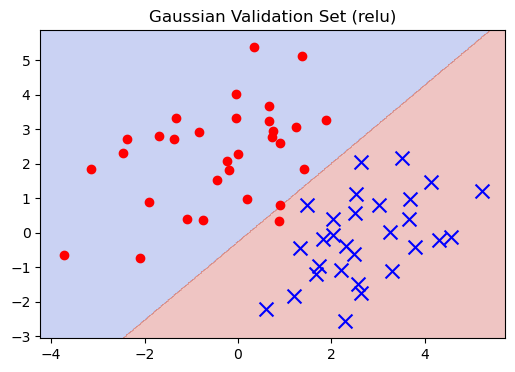

In [105]:
for act in activations:
    m = SingleNeuron(learning_rate=0.01, n_epochs=n_epochs, activation=act)
    
    start_time = time.time()
    m.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    y_pred_train = m.predict(X_train)
    y_pred_val = m.predict(X_val)
    
    train_acc = accuracy_score(y_train, y_pred_train)
    val_acc = accuracy_score(y_val, y_pred_val)
    
    results[('Gaussian_Train', act)] = {'acc': train_acc, 'time': train_time}
    results[('Gaussian_Val', act)] = {'acc': val_acc, 'time': train_time}

    print(f"Activation: {act}")
    print(f"Train Accuracy: {train_acc*100:.2f}%")
    print(f"Val Accuracy: {val_acc*100:.2f}%")
    print(f"Time: {train_time:.6f}s")
    
    m.plot_decision_boundary(X_val, y_val, title="Gaussian Validation Set")